# Лабораторная работа 4

Деревья решений

Выполнил: 6132-010402D, Габбасов Раиль

0.  Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('../data/zoo3.csv')

In [3]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
1,ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
2,boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
3,bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
4,cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,vespa,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6
66,bicho-pau,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,7
67,caracol-da-mata-atlantica,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
68,caranguejeira,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,7


In [4]:
df.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью `pd.factorize` / `pd.get_dummies`

1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета `KNeighborsClassifier` (без использования конвееров)

1.2. То же самое и использованием `sklearn.pipeline.Pipeline`

1.3. С помощью `GridSearchCV` произвести подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`) и выведите значение гиперпараметра и метрику для наилучшей модели

In [5]:
df.isna().any().any()

False

In [6]:
len(df.animal_name.unique())

70

In [7]:
df2 = df.drop(columns=['animal_name'])

In [8]:
df2

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
1,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
2,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
3,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6
66,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,7
67,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
68,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,7


In [9]:
for column in df2.columns:
    print(column, df2[column].unique())

hair [1 0]
feathers [0 1]
eggs [0 1]
milk [1 0]
airborne [0 1]
aquatic [0 1]
predator [0 1]
toothed [1 0]
backbone [1 0]
breathes [1 0]
venomous [0 1]
fins [0 1]
legs [4 0 2 6 8]
tail [0 1]
domestic [0 1]
catsize [0 1]
class_type [1 2 3 4 5 6 7]


In [10]:
# преобразовываем категориальные признаки в бинарные
df2 = pd.get_dummies(df2, columns=['legs'])

In [11]:
for column in df2.columns:
    print(column, df2[column].unique())

hair [1 0]
feathers [0 1]
eggs [0 1]
milk [1 0]
airborne [0 1]
aquatic [0 1]
predator [0 1]
toothed [1 0]
backbone [1 0]
breathes [1 0]
venomous [0 1]
fins [0 1]
tail [0 1]
domestic [0 1]
catsize [0 1]
class_type [1 2 3 4 5 6 7]
legs_0 [0 1]
legs_2 [0 1]
legs_4 [1 0]
legs_6 [0 1]
legs_8 [0 1]


In [12]:
# 1.1 

In [13]:
y1 = df2.pop('class_type')

In [14]:
# Нормализуем значения признаков
scaler = MinMaxScaler()  # применение не особо к месту, ибо датасет бинарный
scaler2 = scaler.fit_transform(df2)

In [15]:
df2.values

array([[1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 0]], dtype=int64)

In [16]:
scaler2

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [17]:
# делим на обучающую и тестовую выборки
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(scaler2, y1, test_size=0.33, random_state=0)

In [18]:
model = KNeighborsClassifier()
model.fit(Xtrain1, Ytrain1)
y_pred1 = model.predict(Xtest1)

In [19]:
print("Accuracy:", accuracy_score(Ytest1, y_pred1))

Accuracy: 0.8333333333333334


In [20]:
# 1.2

In [21]:
# то же самое, но с использованием pipeline
model2 = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])
model2.fit(Xtrain1, Ytrain1)
y_pred1 = model2.predict(Xtest1)

In [22]:
print("Accuracy:", accuracy_score(Ytest1, y_pred1))

Accuracy: 0.8333333333333334


In [23]:
# 1.3

In [24]:
# производим подбор оптимальных гиперпараметров
parameters = {'n_neighbors': range(2, 30)}
model3 = GridSearchCV(KNeighborsClassifier(), parameters)
model3.fit(Xtrain1, Ytrain1)
model3.best_params_

c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


{'n_neighbors': 3}

In [25]:
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(Xtrain1,Ytrain1)
y_pred1 = model3.predict(Xtest1)
print("Accuracy:", accuracy_score(Ytest1, y_pred1))

Accuracy: 0.8333333333333334



2.1. Продемонстрировать работу `DecisionTreeClassifier`, посчитать метрики качества на отложенной выборке

2.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать `max_depth`, `max_features` и может быть что-то ещё)

2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности


In [26]:
# 2.1

model4 = DecisionTreeClassifier()
model4.fit(Xtrain1, Ytrain1)
y_pred1 = model4.predict(Xtest1)
print("Accuracy:", accuracy_score(Ytest1, y_pred1))

model4.get_params()

Accuracy: 0.9583333333333334


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [27]:
# 2.2 

parameters = {'max_depth': [None] + list(range(2, 30)), 
              'max_features': (None, 'auto', 'sqrt', 'log2'),
             'splitter': ('best', 'random')}
model5 = GridSearchCV(model4, parameters)
model5.fit(Xtrain1, Ytrain1)
y_pred1 = model5.predict(Xtest1)
print("Accuracy:", accuracy_score(Ytest1, y_pred1))

model5.best_params_

c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Accuracy: 0.9583333333333334


{'max_depth': 6, 'max_features': None, 'splitter': 'best'}

График


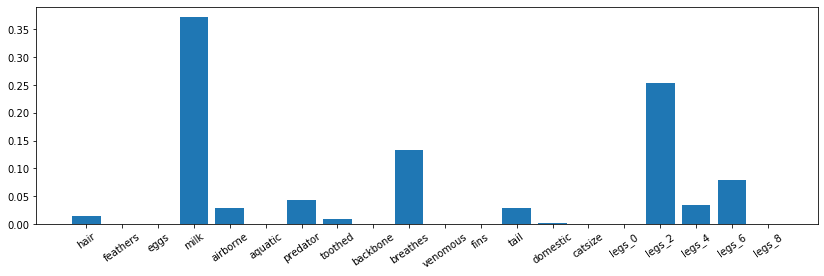

In [28]:
model4 = DecisionTreeClassifier(max_depth=12, max_features='sqrt', splitter='random')
model4.fit(Xtrain1, Ytrain1)
importances = model4.feature_importances_
plt.figure(figsize=(14, 4))
plt.bar(df2.columns, importances)
plt.xticks(rotation=35)
print("График")

In [29]:
# Ищем наиболее важные (3)
s = {col: imp for col, imp in zip(df2.columns, importances)}
sorted(s, reverse=True, key=s.get)[:3]

['milk', 'legs_2', 'breathes']

3.1. Продемонстрировать работу случайного леса `RandomForestClassifier`

3.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики


4. Сделать выводы. Какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.

In [30]:
# 3.1

In [31]:
model6 = RandomForestClassifier()
model6.fit(Xtrain1, Ytrain1)
y_pred1 = model.predict(Xtest1)

model6.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
print("Accuracy:", accuracy_score(Ytest1, y_pred1))

Accuracy: 0.8333333333333334


In [33]:
# 3.2

In [34]:
params = {
    "criterion": ("gini", "entropy"),
    "n_estimators": [5, 10, 15, 30, 50, 100]
}
model7 = GridSearchCV(RandomForestClassifier(), params)
model7.fit(Xtrain1, Ytrain1)
print(model7.best_estimator_)

c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


RandomForestClassifier(n_estimators=30)


In [35]:
y_pred1 = model7.predict(Xtest1)
print("Accuracy:", accuracy_score(Ytest1, y_pred1))

Accuracy: 0.9166666666666666


График


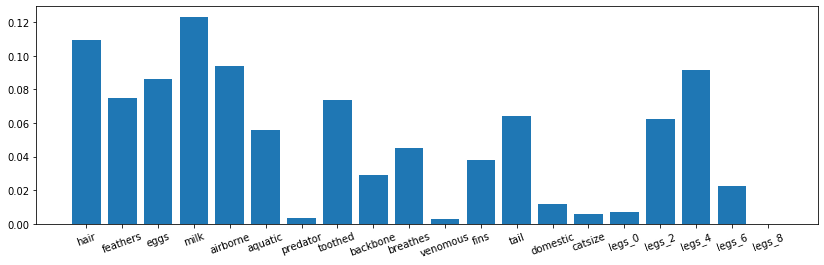

In [36]:
model8 = RandomForestClassifier(criterion='entropy', n_estimators=21)
model8.fit(Xtrain1, Ytrain1)
importances = model8.feature_importances_
plt.figure(figsize=(14, 4))
plt.bar(df2.columns, importances)
plt.xticks(rotation=20)
print("График")

#### 4
Выводы:

Наибольшую точность (Accuracy = 0.958) продемонстрировал классификатор DecisionTreeClassifier() с параметрами по умолчанию.

После него с небольшим отставанием (Accuracy=0.916) идет RandomForestClassifier() с параметром n_estimators=30.